# Lucid Modelzoo

If you want to study techniques for visualizing and understanding neural networks, it's important to be able to try your experiments on multiple models.

 [Lucid](https://github.com/tensorflow/lucid) is a library for visualizing neurla networks.
 As of lucid v0.3, we provide a consistent API for interacting with 27 different vision models.



## General Setup

In [0]:
# Expanded modelzoo is only available as of lucid v0.3
!pip install --quiet lucid==0.3

import numpy as np
import tensorflow as tf

from lucid.misc.io import show, load
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

    100% |████████████████████████████████| 51kB 4.4MB/s 


## Import Modelzoo

In [0]:
# Lucid's modelzoo can be accessed as classes in vision_models
import lucid.modelzoo.vision_models as models

# ... or throguh a more systematic factory API
import lucid.modelzoo.nets_factory as nets

## List Models

As of lucid v0.3

In [0]:
print ""
print "Model".ljust(27), " ", "Dataset"
print ""
for name, Model in nets.models_map.iteritems():
  print name.ljust(27), " ", Model.dataset


Model                         Dataset

PnasnetMobile_slim            ImageNet
PnasnetLarge_slim             ImageNet
InceptionV1_caffe_Places365   Places365
MobilenetV1_025_slim          ImageNet
AlexNet_caffe_Places365       Places365
NasnetMobile_slim             ImageNet
InceptionV2_slim              ImageNet
ResnetV1_101_slim             ImageNet
InceptionV1_caffe             ImageNet
InceptionResnetV2_slim        ImageNet
InceptionV3_slim              ImageNet
InceptionV1_caffe_Places205   Places205
InceptionV1_slim              ImageNet
ResnetV1_50_slim              ImageNet
CaffeNet_caffe                ImageNet
InceptionV4_slim              ImageNet
VGG19_caffe                   ImageNet
ResnetV1_152_slim             ImageNet
MobilenetV1_050_slim          ImageNet
NasnetLarge_slim              ImageNet
AlexNet                       ImageNet
ResnetV2_101_slim             ImageNet
ResnetV2_152_slim             ImageNet
MobilenetV1_slim              ImageNet
VGG16_caffe          

## List Model Layers

We used vgg 16 network to build our features in our encoder ,
to visualize how the hidden layers form the features from the training dataset we visualized the hidden neuron representation

WE can visualize any of the below layers form vgg16. 
we can see that the layer 1 finds the edges and last layer finds from some higer dimensional patterns in the dataset

In [0]:
compelete_layers=""
for layer in models.VGG16_caffe.layers:
  print(layer['name'])
  compelete_layers=compelete_layers+','+layer['name']
print(compelete_layers)

conv1_1/conv1_1
conv1_2/conv1_2
conv2_1/conv2_1
conv2_2/conv2_2
conv3_1/conv3_1
conv3_2/conv3_2
conv3_3/conv3_3
conv4_1/conv4_1
conv4_2/conv4_2
conv4_3/conv4_3
conv5_1/conv5_1
conv5_2/conv5_2
conv5_3/conv5_3
fc6/fc6
fc7/fc7
prob
,conv1_1/conv1_1,conv1_2/conv1_2,conv2_1/conv2_1,conv2_2/conv2_2,conv3_1/conv3_1,conv3_2/conv3_2,conv3_3/conv3_3,conv4_1/conv4_1,conv4_2/conv4_2,conv4_3/conv4_3,conv5_1/conv5_1,conv5_2/conv5_2,conv5_3/conv5_3,fc6/fc6,fc7/fc7,prob


## Show Model Graph

In [0]:
model = models.VGG16_caffe()
model.load_graphdef()

model.show_graph()

## Visualize Neuron

See the [lucid tutorial](https://colab.research.google.com/github/tensorflow/lucid/blob/master/notebooks/tutorial.ipynb) to learn more.

We pick `InceptionV4/InceptionV4/Mixed_6b/concat` from above, and chose to focus on unit 0.

# ***Visualizing convolution layer***

change the layer and press(shift +Enter)

512 1848.6323



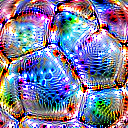

In [0]:
model = models.VGG16_caffe()
model.load_graphdef()
nth_layer='conv5_3/conv5_3' #@param ["conv1_1/conv1_1","conv1_2/conv1_2","conv2_1/conv2_1","conv2_2/conv2_2","conv3_1/conv3_1","conv3_2/conv3_2","conv3_3/conv3_3","conv4_1/conv4_1","conv4_2/conv4_2","conv4_3/conv4_3","conv5_1/conv5_1","conv5_2/conv5_2","conv5_3/conv5_3"]
_ = render.render_vis(model, "{}:0".format(nth_layer))

## Caricature

a picture, description, or imitation of a person in which certain striking characteristics are exaggerated in order to create a comic or grotesque effect.


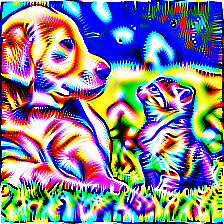

None


In [0]:
from lucid.recipes.caricature import feature_inversion
cat_dog_url="https://storage.googleapis.com/lucid-static/building-blocks/examples/dog_cat.png"

url = 'https://cdn.pixabay.com/photo/2013/07/19/00/18/tiger-165189__340.jpg' #@param {type:"string"}
nth_layer='conv3_1/conv3_1' #@param ["conv1_1/conv1_1","conv1_2/conv1_2","conv2_1/conv2_1","conv2_2/conv2_2","conv3_1/conv3_1","conv3_2/conv3_2","conv3_3/conv3_3","conv4_1/conv4_1","conv4_2/conv4_2","conv4_3/conv4_3","conv5_1/conv5_1","conv5_2/conv5_2","conv5_3/conv5_3"]
img = load(cat_dog_url)

model = models.VGG16_caffe()
model.load_graphdef()

result = feature_inversion(img, model, "{}".format(nth_layer), n_steps=512, cossim_pow=0.0)
show(result)

Word Embedings url :
  https://projector.tensorflow.org